In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tqdm
from numpy.random import RandomState

In [16]:
dir_path = os.getcwd()
dir_path

'c:\\Users\\filbe\\Desktop\\4342\\Project'

In [17]:
def process_image(path, crop_size):
    image = Image.open(path)
    image = image.convert("L")

    image = image.crop(
        (crop_size, crop_size, image.size[0] - crop_size, image.size[1] - crop_size)
    )

    image = image.resize((28, 28))
    return image

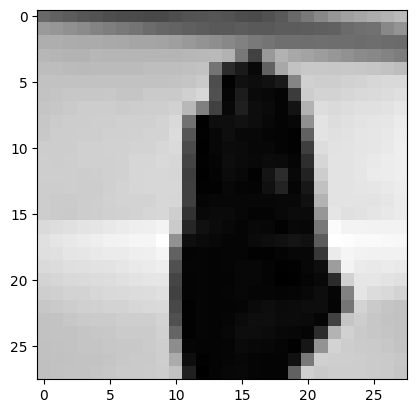

In [18]:
image = process_image(os.path.join(dir_path, "mnist-sign-language/B/B1.jpg"), 10)

plt.show(image)
plt.imshow(image, cmap="gray")

In [19]:
def image_to_dataframe(image, label):
    data = np.array(image)
    data = data.flatten()
    
    df = pd.DataFrame([label, *data]).transpose()

    return df

In [20]:
dirpath = os.getcwd()

for filename in tqdm.tqdm(os.listdir(os.path.join(dir_path, "mnist-sign-language/A"))):
    if filename.endswith(".jpg") and filename.startswith("A"):
        image = process_image(os.path.join("mnist-sign-language/A", filename), 4)
        df = image_to_dataframe(image, 0)
        df.to_csv("a.csv", mode="a", header=False, index=False)
for filename in tqdm.tqdm(os.listdir(os.path.join(dir_path, "mnist-sign-language/B"))):
    if filename.endswith(".jpg") and filename.startswith("B"):
        image = process_image(os.path.join("mnist-sign-language/B", filename), 4)
        df = image_to_dataframe(image, 1)
        df.to_csv("b.csv", mode="a", header=False, index=False)
for filename in tqdm.tqdm(os.listdir(os.path.join(dir_path, "mnist-sign-language/C"))):
    if filename.endswith(".jpg") and filename.startswith("C"):
        image = process_image(os.path.join("mnist-sign-language/C", filename), 4)
        df = image_to_dataframe(image, 2)
        df.to_csv("c.csv", mode="a", header=False, index=False)

100%|██████████| 3000/3000 [00:28<00:00, 106.77it/s]


In [22]:
header = ['label'] + [f'pixel{i+1}' for i in range(784)]
header = pd.DataFrame([header])
header.to_csv("train.csv", mode="a", header=False, index=False)
header.to_csv("test.csv", mode="a", header=False, index=False)

for filename in tqdm.tqdm(os.listdir()):
    if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        rng = RandomState()

        train = df.sample(frac=0.7, random_state=rng)
        test = df.loc[~df.index.isin(train.index)]

        train.to_csv("train.csv", mode="a", header=False, index=False)
        test.to_csv("test.csv", mode="a", header=False, index=False)

  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:05<00:00,  3.13it/s]
